# Experiment 1.2: Generalizability Analysis

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import numpy as np

sns.set_theme(style="whitegrid")
RESULTS_DIR = Path('./results')


fig_dir = Path('figures')
fig_dir.mkdir(exist_ok=True)


plt.rcParams.update({
    "font.size": 40,
    "axes.titlesize": 40,
    "axes.labelsize": 40,
    "legend.fontsize": 40
})

plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
plt.rcParams['text.color'] = 'black'   # Set text color to black
plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

## Data Preparation

In [8]:
all_results = []
for result_file in RESULTS_DIR.glob('*_generalizability_results.json'):
    match = re.match(r'(.+)_run_(\d+)_generalizability_results.json', result_file.name)
    if match:
        benchmark_name, run_number = match.groups()
        with open(result_file, 'r') as f:
            data = json.load(f)
            for arch, arch_results in data['architectures'].items():
                # Original
                all_results.append({
                    'Benchmark': benchmark_name.replace('_', ' ').title(),
                    'Run': int(run_number),
                    'Architecture': arch.capitalize(),
                    'Dataset': 'Original',
                    'Worst-Group Accuracy': arch_results['initial_worst'],
                    'Overall Accuracy': arch_results['initial_overall']
                })
                # Augmented
                all_results.append({
                    'Benchmark': benchmark_name.replace('_', ' ').title(),
                    'Run': int(run_number),
                    'Architecture': arch.capitalize(),
                    'Dataset': 'Augmented',
                    'Worst-Group Accuracy': arch_results['augmented_worst'],
                    'Overall Accuracy': arch_results['augmented_overall']
                })

df = pd.DataFrame(all_results)

## Plot 1: Worst-Group Accuracy Comparison (Averaged Across Runs)

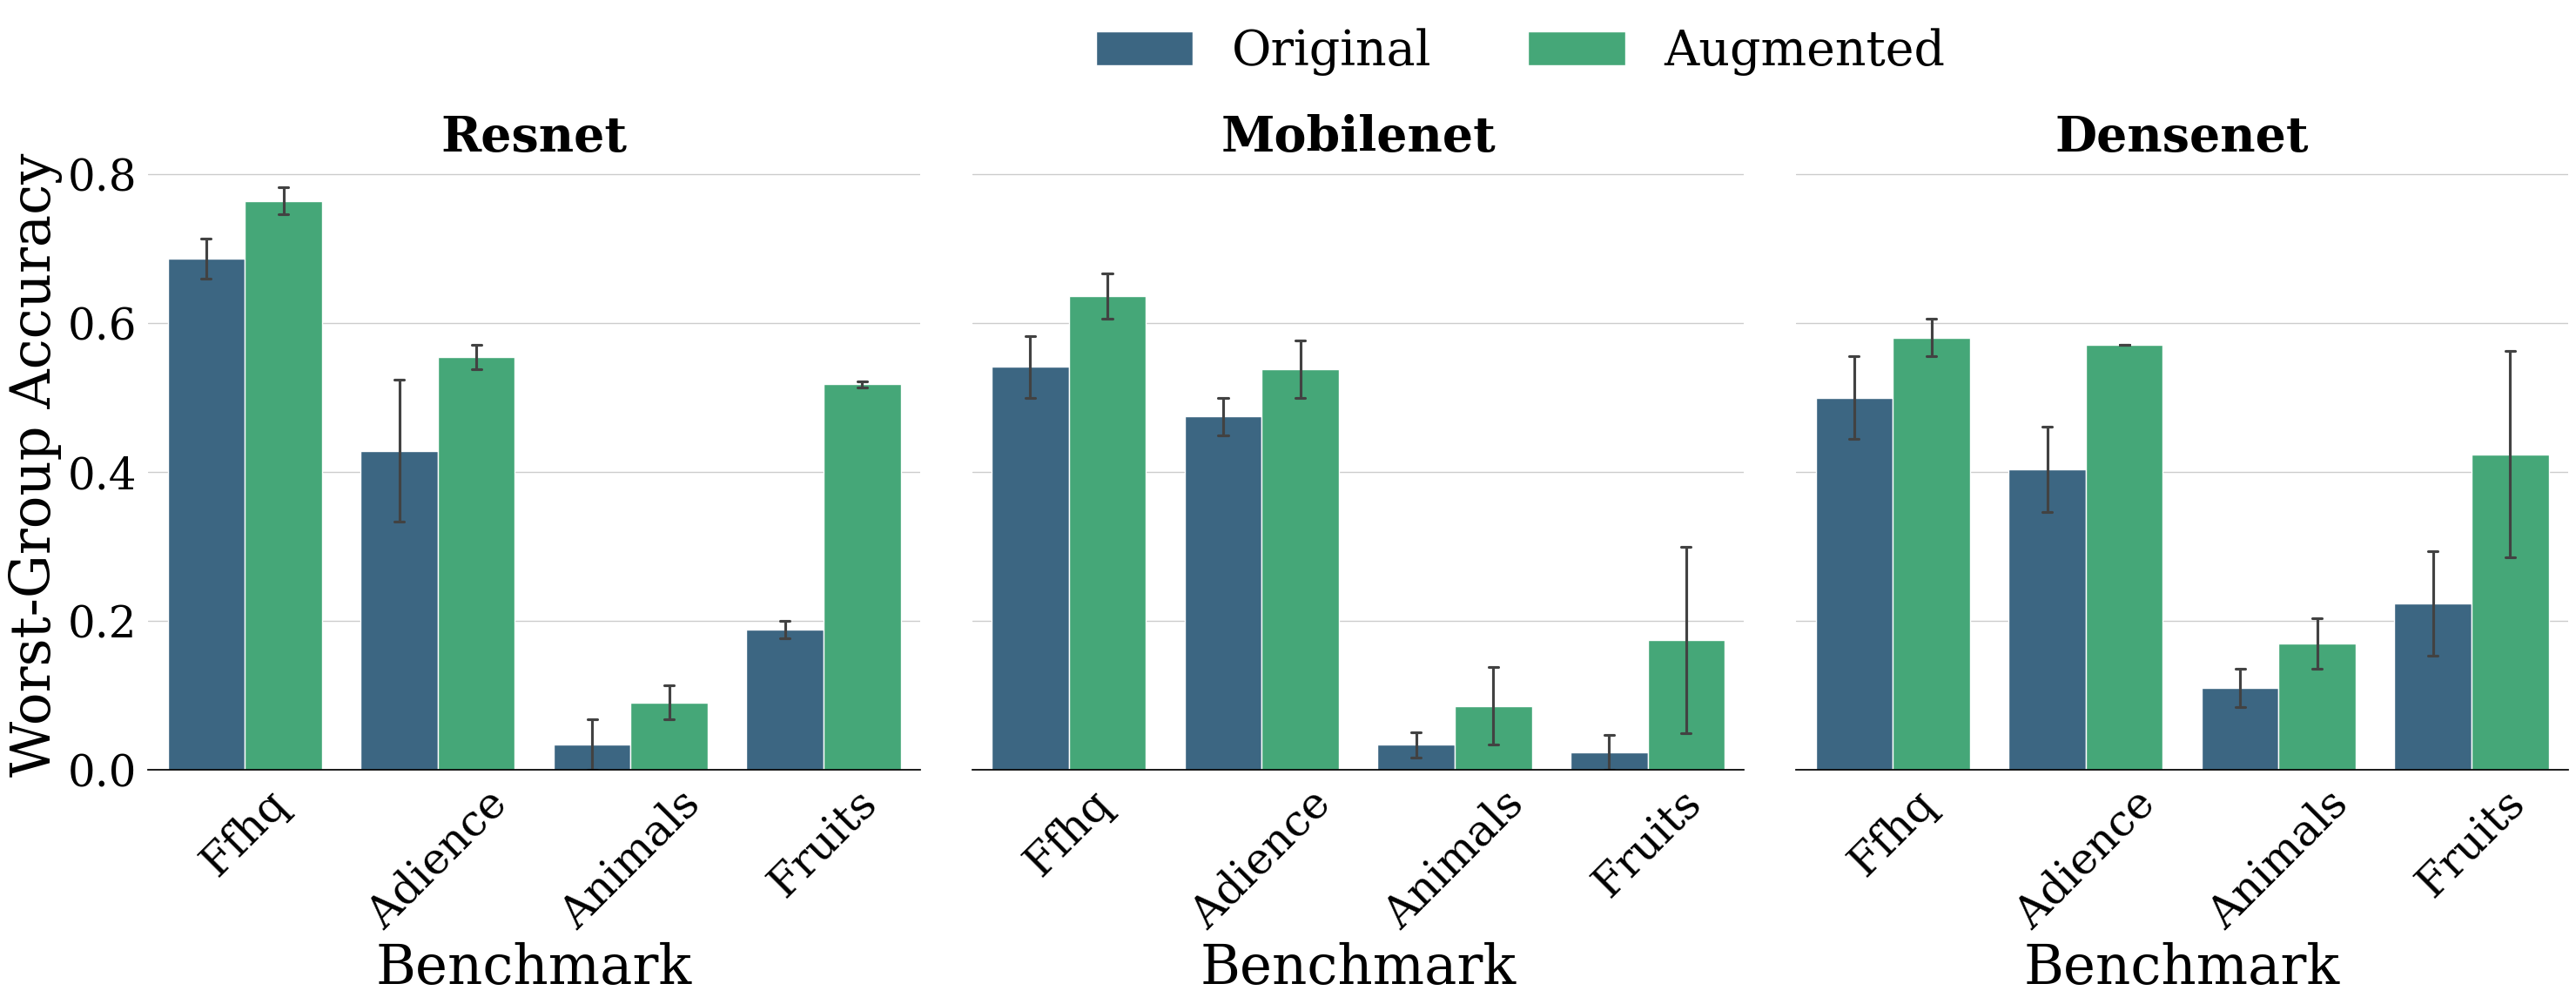

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

# Plot
g = sns.catplot(
    data=df,
    kind="bar",
    x="Benchmark",
    y="Worst-Group Accuracy",
    hue="Dataset",
    col="Architecture",
    palette="viridis",
    height=10,  # Increased height further
    aspect=1.0,
    errorbar="se",
    capsize=0.1,
)

g.despine(left=True)

# Axis labels and titles with larger fonts
g.set_axis_labels("Benchmark", "Worst-Group Accuracy", fontsize=45)
g.set_titles("{col_name}", fontsize=45)

# Tick labels font size
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize=36, rotation=45)
    ax.tick_params(axis="y", labelsize=36)

# --- remove default legends ---
try:
    g._legend.remove()
except Exception:
    pass
for ax in g.axes.flatten():
    leg = ax.get_legend()
    if leg:
        leg.remove()

# --- collect handles/labels from one axes ---
handles, labels = [], []
for ax in g.axes.flatten():
    h, l = ax.get_legend_handles_labels()
    if l:
        handles, labels = h, l
        break

# de-duplicate labels (order-preserving)
by_label = OrderedDict(zip(labels, handles))
labels = list(by_label.keys())
handles = list(by_label.values())

# --- add figure-level legend ---
g.fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=len(labels),          # one row
    bbox_to_anchor=(0.5, 1.05),
    frameon=False,
    title=None,
    fontsize=40
)

# adjust space for legend
g.fig.subplots_adjust(top=0.85)

# Save & show
plt.savefig(fig_dir / "worst_group_accuracy_across_multiple_archs.png", dpi=300, bbox_inches="tight")
plt.show()

## Plot 2: Overall Accuracy Comparison (Averaged Across Runs)

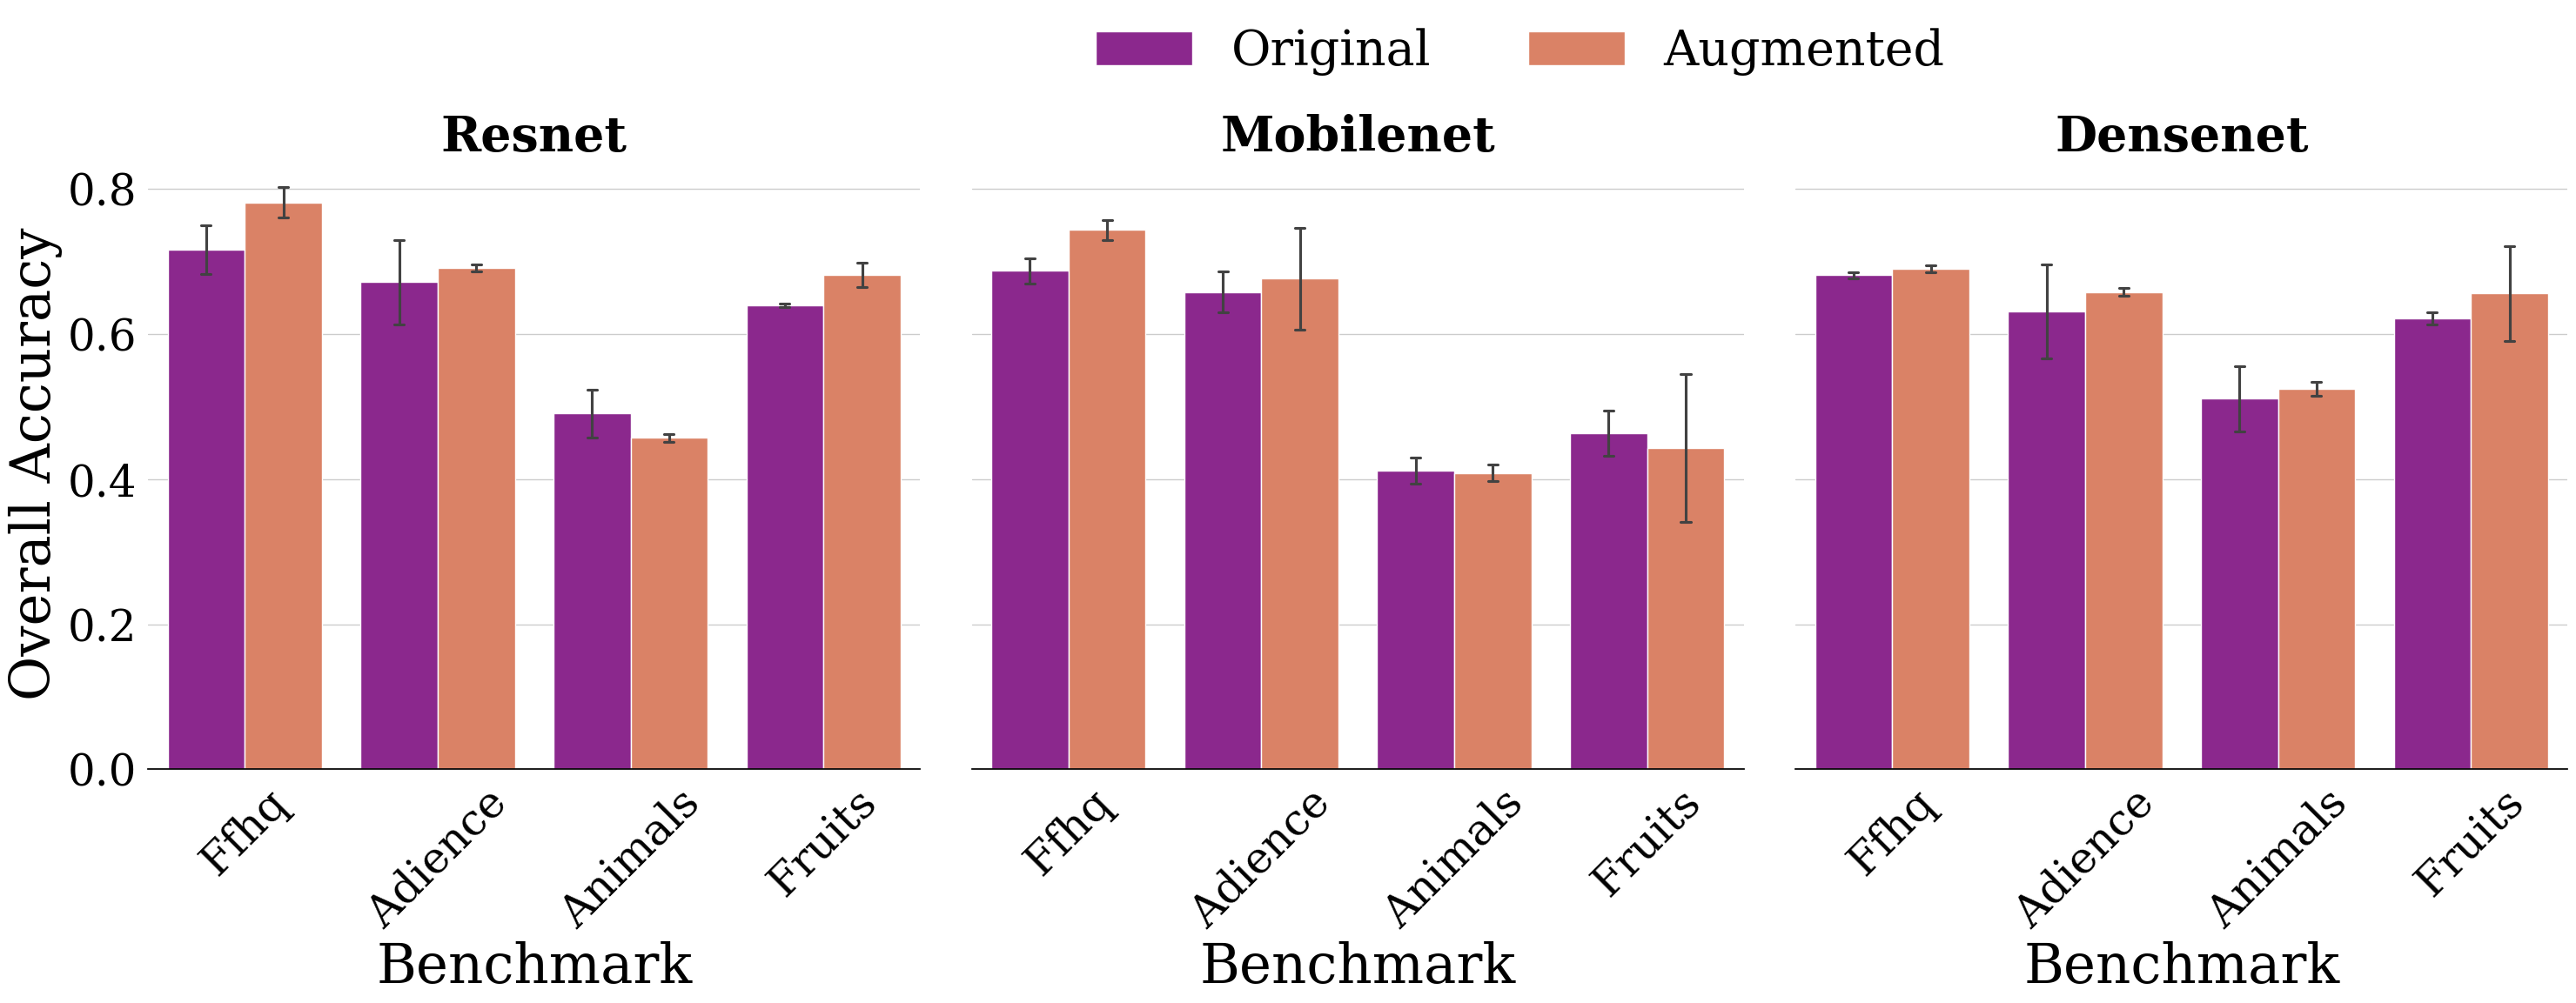

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

# Plot
g = sns.catplot(
    data=df,
    kind="bar",
    x="Benchmark",
    y="Overall Accuracy",
    hue="Dataset",
    col="Architecture",
    palette="plasma",
    height=10,  # Increased height further
    aspect=1.0,
    errorbar="se",
    capsize=0.1
)

g.despine(left=True)

# Axis labels and titles with larger fonts
g.set_axis_labels("Benchmark", "Overall Accuracy", fontsize=45)
g.set_titles("{col_name}", fontsize=45)

# Tick labels font size
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize=36, rotation=45)
    ax.tick_params(axis="y", labelsize=36)

# --- remove default legends ---
try:
    g._legend.remove()
except Exception:
    pass
for ax in g.axes.flatten():
    leg = ax.get_legend()
    if leg:
        leg.remove()

# --- collect handles/labels from one axes ---
handles, labels = [], []
for ax in g.axes.flatten():
    h, l = ax.get_legend_handles_labels()
    if l:
        handles, labels = h, l
        break

# de-duplicate labels (order-preserving)
by_label = OrderedDict(zip(labels, handles))
labels = list(by_label.keys())
handles = list(by_label.values())

# --- add figure-level legend ---
g.fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05),
    frameon=False,
    title=None,
    fontsize=40
)

# adjust space for legend
g.fig.subplots_adjust(top=0.85)

# Save and show
plt.savefig(fig_dir / "overall_accuracy_across_multiple_archs.png", dpi=300, bbox_inches="tight")
plt.show()

## Plot 3: Analysis of Improvement (Averaged Across Runs)

In [5]:
df_pivot = df.pivot_table(
    index=['Benchmark', 'Architecture', 'Run'],
    columns='Dataset',
    values=['Worst-Group Accuracy', 'Overall Accuracy']
).reset_index()

df_pivot.columns = ['_'.join(col).strip('_') for col in df_pivot.columns.values]

df_pivot['Worst-Group Improvement'] = df_pivot['Worst-Group Accuracy_Augmented'] - df_pivot['Worst-Group Accuracy_Original']
df_pivot['Overall Accuracy Change'] = df_pivot['Overall Accuracy_Augmented'] - df_pivot['Overall Accuracy_Original']

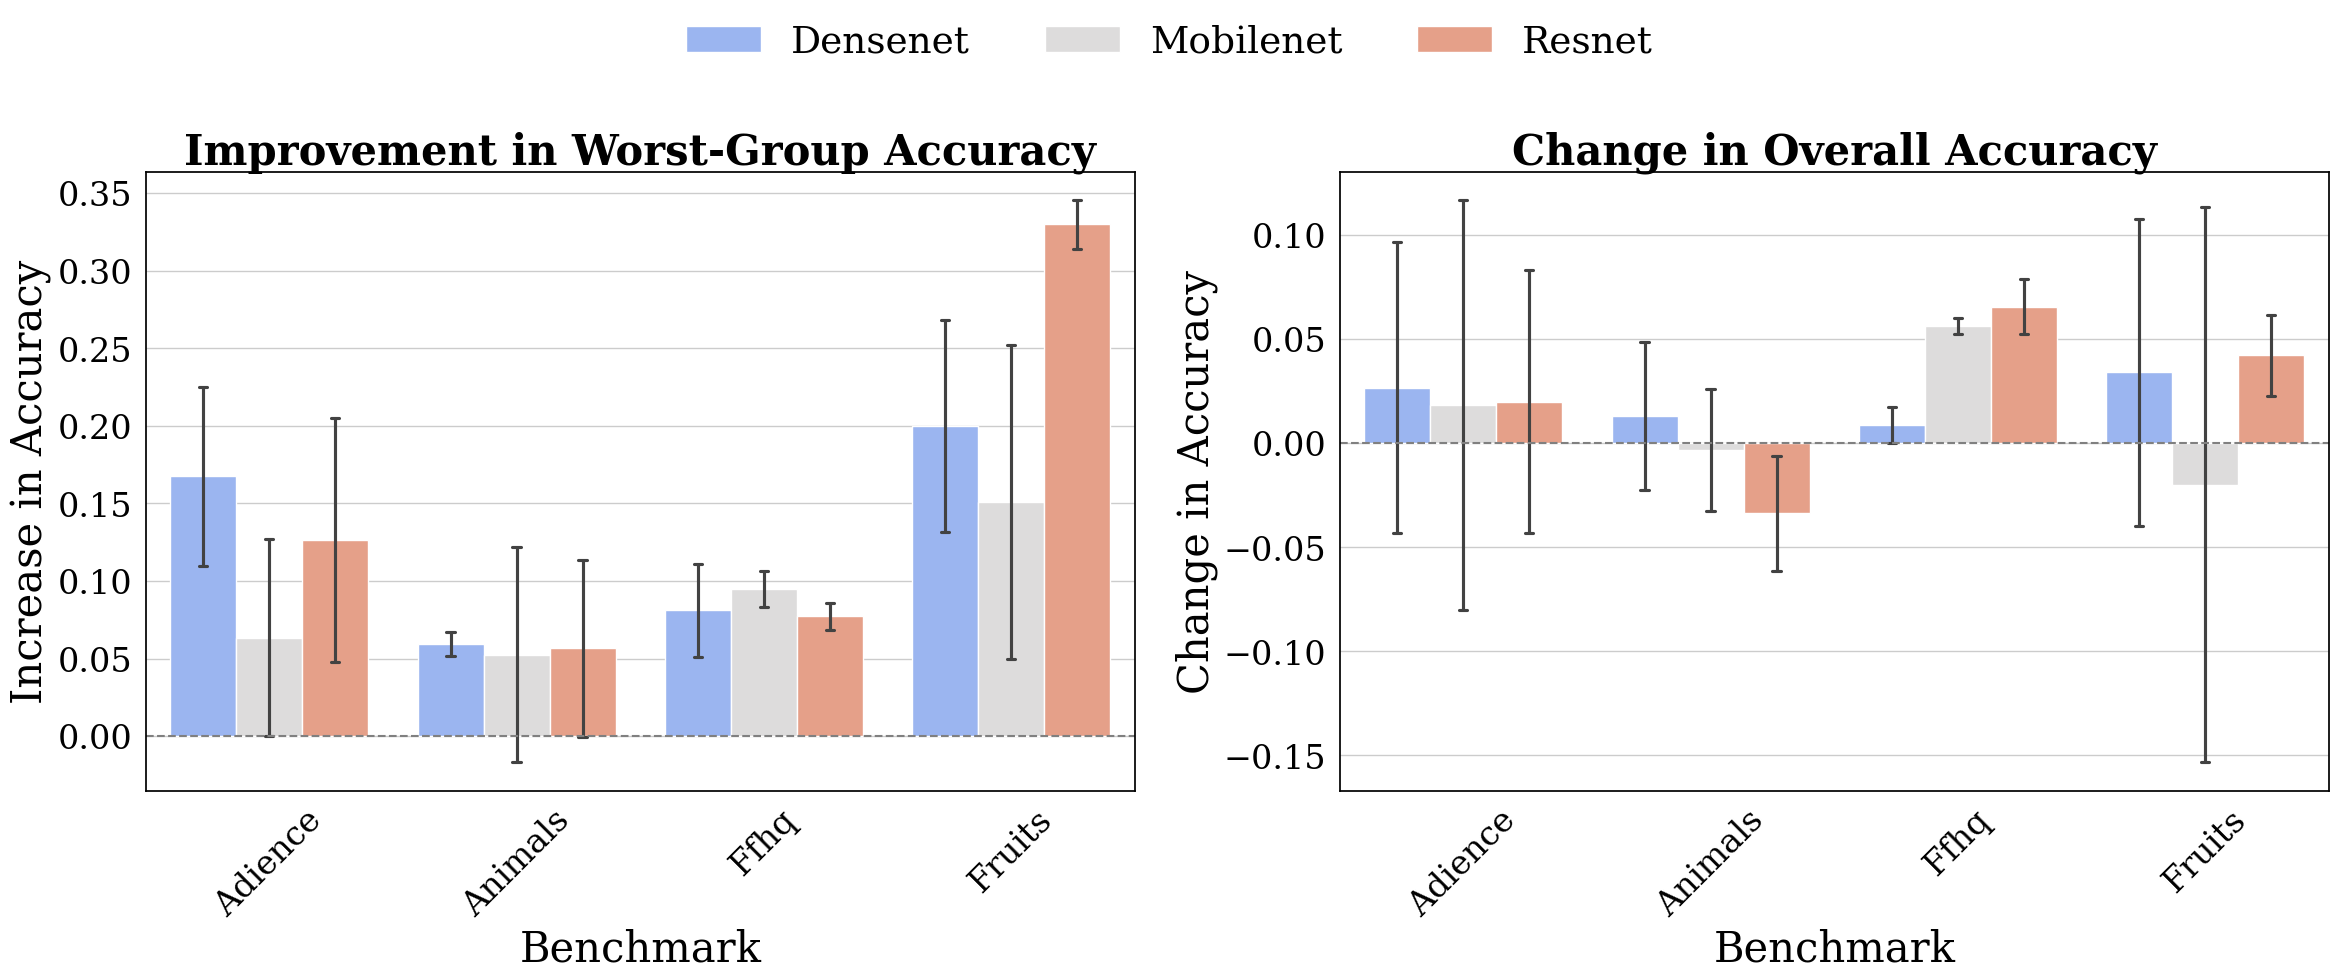

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(28, 12), sharey=False)

# Left plot
sns.barplot(
    ax=axes[0],
    data=df_pivot,
    x='Benchmark',
    y='Worst-Group Improvement',
    hue='Architecture',
    palette='coolwarm',
    errorbar="se",
    capsize=0.1
)
axes[0].set_title('Improvement in Worst-Group Accuracy', fontsize=45)
axes[0].set_ylabel('Increase in Accuracy', fontsize=45)
axes[0].set_xlabel('Benchmark', fontsize=45)
axes[0].axhline(0, color='grey', linestyle='--')
axes[0].tick_params(axis="x", labelsize=36, rotation=45)
axes[0].tick_params(axis="y", labelsize=36)

# Right plot
sns.barplot(
    ax=axes[1],
    data=df_pivot,
    x='Benchmark',
    y='Overall Accuracy Change',
    hue='Architecture',
    palette='coolwarm',
    errorbar="se",
    capsize=0.1
)
axes[1].set_title('Change in Overall Accuracy', fontsize=45)
axes[1].set_ylabel('Change in Accuracy', fontsize=45)
axes[1].set_xlabel('Benchmark', fontsize=45)
axes[1].axhline(0, color='grey', linestyle='--')
axes[1].tick_params(axis="x", labelsize=36, rotation=45)
axes[1].tick_params(axis="y", labelsize=36)

# --- remove duplicate legends from axes ---
handles, labels = axes[0].get_legend_handles_labels()
for ax in axes:
    leg = ax.get_legend()
    if leg:
        leg.remove()

# --- add a single figure-level legend ---
by_label = OrderedDict(zip(labels, handles))  # deduplicate
fig.legend(
    by_label.values(),
    by_label.keys(),
    loc="upper center",
    ncol=len(by_label),
    bbox_to_anchor=(0.5, 1.05),
    frameon=False,
    fontsize=40,
    title=None
)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save and show
plt.savefig(fig_dir / "accuracy_change_after_augmentation.png", dpi=300, bbox_inches="tight")
plt.show()